In [1]:
#(1) importing libraries.
#(2) importing Dataset.
#(3) Getting and understanding about the data with which you are working.
#(4) Getting and understanding about the problem that u are trying to solves.
#(5) EDA (Rigorous)----> Approximate Patterns.
#(6) Approximate Patterns --->Shortlist the probable list of the ML algorithm that YOU want to try.
#(7) Creating seprat jupyter notebook for pre processing the data for 2-3 algo.
#(8) Features Engineering
#(9) Features Selection
#(10) Train Test Split
#(11) Training/Fitting The ML model
#(12) Prediting From The Ml traning model
#(13) Evalution THe model
#(14) Optimization -> If the Model Evaltion is don,t meet Your criteria
#(15) Deploy the MOdel into production
#(16) Maintaince Work for the Model


In [2]:
# Import important libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('Mall_Customers_BP.xlsx')
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.dtypes

CustomerID         int64
Genre             object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
# DATA PREPROCESSING
# (1) Outlier
# (2) Scaling
# (3) Elbo method

In [9]:
import seaborn as sns

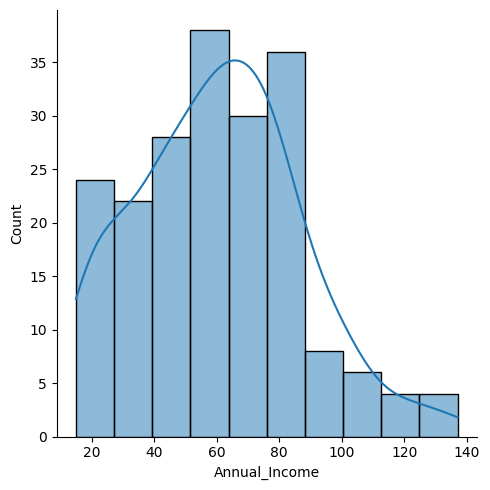

In [10]:
sns.displot(df['Annual_Income'],kde = True)

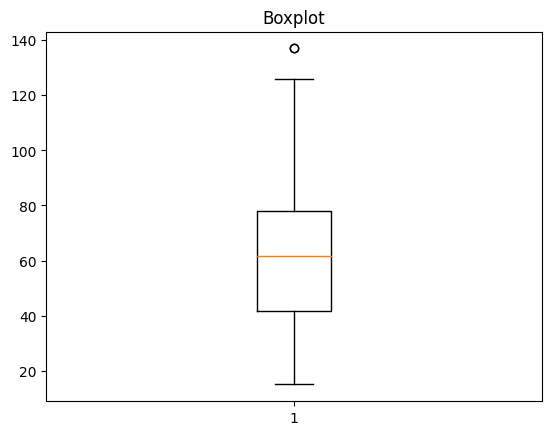

In [11]:
plt.boxplot(df.Annual_Income);plt.title('Boxplot');plt.show()

In [12]:
from scipy.stats.mstats import winsorize

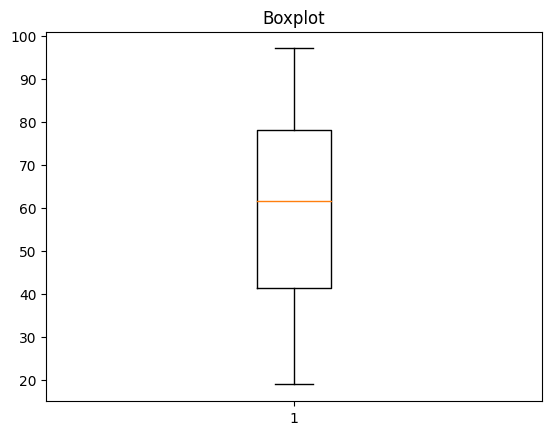

In [13]:
df['Annual_Income']=winsorize(df.Annual_Income,limits=[0.05, 0.095])   
plt.boxplot(df['Annual_Income']);plt.title('Boxplot');plt.show()

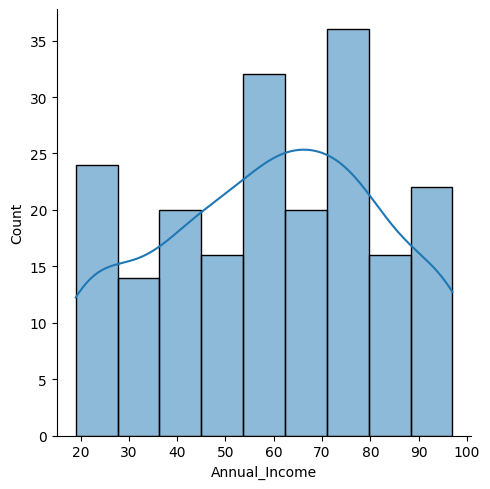

In [14]:
sns.displot(df['Annual_Income'],kde = True)

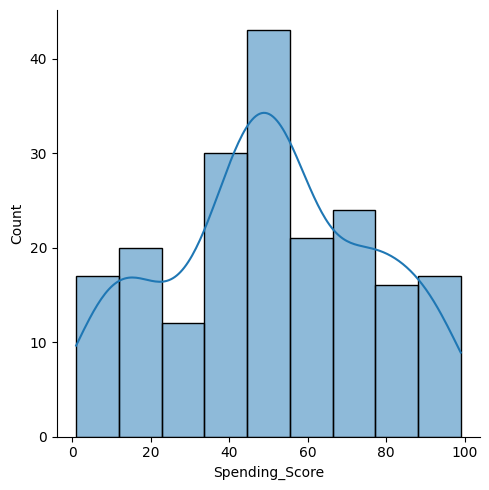

In [15]:
sns.displot(df['Spending_Score'],kde = True)

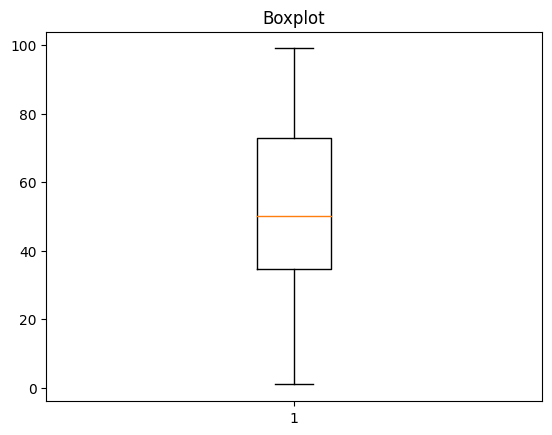

In [16]:
plt.boxplot(df.Spending_Score);plt.title('Boxplot');plt.show()

In [17]:
#There are no outlier present in spending score column.

In [18]:
# Scaling
scaler = StandardScaler()
df[['Annual_Income','Spending_Score']]=scaler.fit_transform(df[['Annual_Income','Spending_Score']])

In [19]:
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,-1.721206,-0.434801
1,2,Male,21,-1.721206,1.195704
2,3,Female,20,-1.721206,-1.715913
3,4,Female,23,-1.721206,1.040418
4,5,Female,31,-1.721206,-0.395980


In [20]:
(df==0).all()

CustomerID        False
Genre             False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

In [21]:
#Distorsion/inertia--->compactness of cluster

In [23]:
# Elbow Curve

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Making a separate array file
array1 = df['Annual_Income'].to_numpy()
array2 = df['Spending_Score'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.215225652347822
2 : 1.029519058090068
3 : 0.7370621626778106
4 : 0.6160588335147582
5 : 0.4742257681353999
6 : 0.41816220604320703
7 : 0.38873481444691554
8 : 0.361001627691372
9 : 0.3364589398758532
10 : 0.31180453889868975
11 : 0.30290011452827176
12 : 0.2809497160990036
13 : 0.26574090747891405
14 : 0.25580117697784305


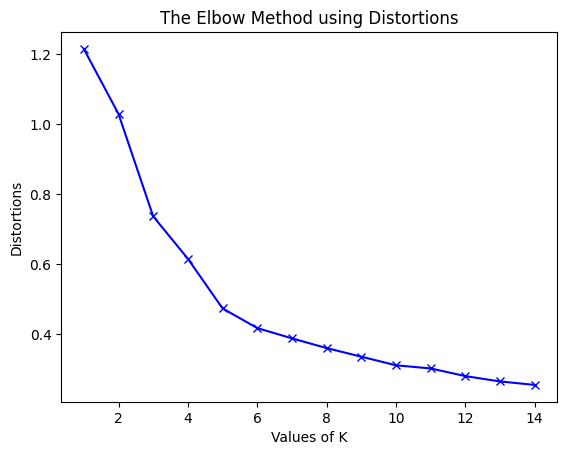

In [25]:
# Using distortions -
for key, val in mapping1.items():
    print(str(key) + ' : ' + str(val))
    
# Plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortions')
plt.show()
    

1 : 400.0
2 : 257.45601296488996
3 : 151.16455006157088
4 : 99.64059196304275
5 : 52.18658887843006
6 : 43.02690705928397
7 : 37.761725541170065
8 : 32.25299937541284
9 : 27.73230177476626
10 : 24.82612758160102
11 : 21.781678535624074
12 : 19.187622487492824
13 : 17.37621627848585
14 : 15.983080266150175


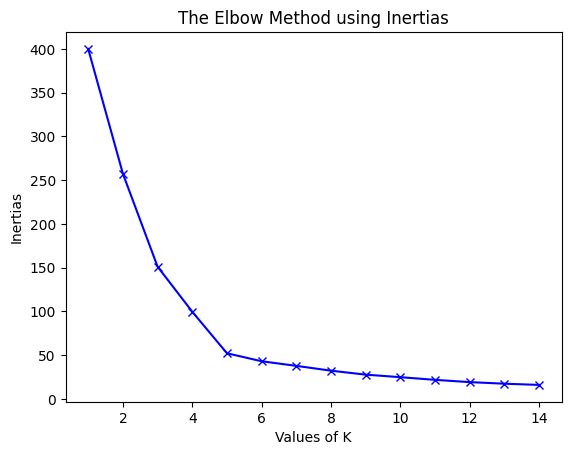

In [28]:
# Using inertias -
for key, val in mapping2.items():
    print(str(key) + ' : ' + str(val))
    
# Plot
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [30]:
# Training the Optimal Model and getting the centroids
data = pd.DataFrame(array, columns = ('Annual Income (k$)', 'Spending Score (1-100)'))

kmeans = KMeans(n_clusters = 5).fit(data)
centroids = kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[-1.39140582 -1.13696536]
 [-0.20346863 -0.00676889]
 [-1.41515549  1.13217788]
 [ 1.03416817 -1.22553537]
 [ 1.01815172  1.23950275]]


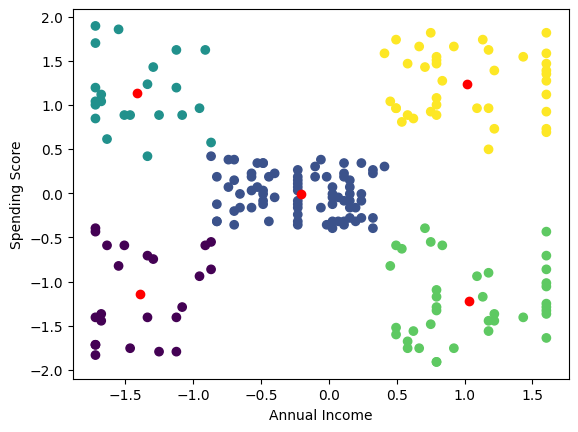

In [31]:
# Plot
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
            c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()